In [2]:
'''
la compagnia Pinco & Pallino srl vuole immettere nel mercato un nuovo prodotto, 
una nuova bottiglia di vino che sia al pari con la concorrenza 
in base a prezzo e qualità dei prodotti nel mercato.


Il nuovo prodotto sarà scelto in base ai migliori vini.

Trasformiamo i dati che abbiamo in informazioni,

trovare il miglior vino in base a:
1) Review (marketing) 

da quanto emerge da una recente ricerca sulle intenzioni di ricerca su Google,
la descrizione è il primo fattore che influenza la visita o meno del sito.

2) Price e Rating(posizionamento nel mercato e target di riferimento)

'''

'\nla compagnia Pinco & Pallino srl vuole immettere nel mercato un nuovo prodotto, \nuna nuova bottiglia di vino che sia al pari con la concorrenza \nin base a prezzo e qualità dei prodotti nel mercato.\n\n\nIl nuovo prodotto sarà scelto in base ai migliori vini.\n\nTrasformiamo i dati che abbiamo in informazioni,\n\ntrovare il miglior vino in base a:\n1) Review (marketing) \n\nda quanto emerge da una recente ricerca sulle intenzioni di ricerca su Google,\nla descrizione è il primo fattore che influenza la visita o meno del sito.\n\n2) Price e Rating(posizionamento nel mercato e target di riferimento)\n\n\n'

In [1]:
#Import data

In [3]:
import pandas as pd 

In [4]:
df= pd.read_csv("winemag-data_first150k.csv")

In [5]:
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
# structured data

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [8]:
df.shape

(150930, 11)

# Preprocessing 

In [9]:
# Nan

In [6]:
df.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [7]:
# Duplicate

In [8]:
len(df["description"])

150930

In [9]:
df.drop_duplicates("description", keep=False, inplace=True)

In [10]:
len(df["description"])

58537

In [11]:
150930 - 58537

92393

In [12]:
# We have delete 92393 duplicate

In [13]:
df.shape

(58537, 11)

In [14]:
# Delete nan value
df.dropna(subset=["designation","price"], inplace=True)

In [15]:
df.shape

(36711, 11)

In [16]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [17]:
# check outlayer 

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

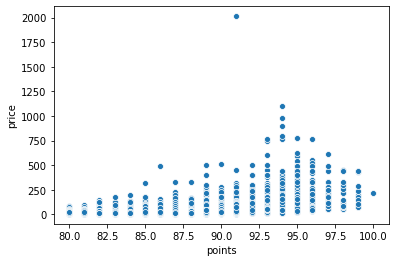

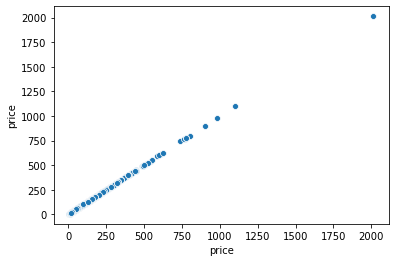

In [19]:
for c in ['points', 'price']:
    sn.scatterplot(data=df, x=c, y="price")
    # se non faccio plt.show sovrappone tutto
    plt.show()

In [20]:
# Show the outlayer value 
df.loc[df['price'].idxmax()]

Unnamed: 0                                                 13318
country                                                       US
description    The nose on this single-vineyard wine from a s...
designation                                  Roger Rose Vineyard
points                                                        91
price                                                       2013
province                                              California
region_1                                             Arroyo Seco
region_2                                           Central Coast
variety                                               Chardonnay
winery                                                     Blair
Name: 13318, dtype: object

In [21]:
df["points"].mean()

88.38220151998038

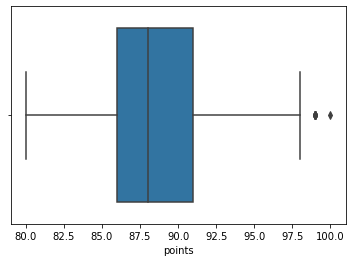

In [22]:
sn.boxplot(x=df['points'])

In [23]:
df['wine and winery']=df['variety']+" by "+df['winery']

In [24]:
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine and winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,Cabernet Sauvignon by Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,Tinta de Toro by Bodega Carmen Rodríguez


In [25]:
df["price"].mean()

37.230721037291275

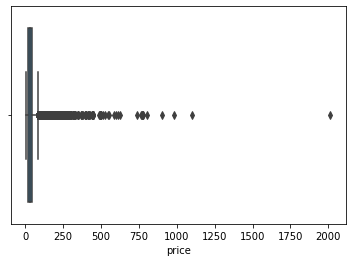

In [26]:
sn.boxplot(x=df['price'])

In [27]:
df["price"].quantile(0.95)

90.0

In [28]:
df.quantile(0.95)

Unnamed: 0    143739.0
points            94.0
price             90.0
Name: 0.95, dtype: float64

In [29]:
# il 94% dei miei valori (prezzo) sono sotto ad 85

In [30]:
# or 
low = .05
high = .95
quant_df = df.quantile([low, high])
print(quant_df)

      Unnamed: 0  points  price
0.05      3219.5    83.0   10.0
0.95    143739.0    94.0   90.0


In [31]:
# Delete rows od df where df is upper 96 percentile

In [32]:
df[df < df.quantile(.95)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine and winery
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149627,NaN,NaN,NaN,NaN,84.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
149629,NaN,NaN,NaN,NaN,84.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
149630,NaN,NaN,NaN,NaN,84.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
149631,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
limit=df["points"].quantile(.95)
limit

94.0

In [34]:
valid_data = df[df["points"]<limit]

In [35]:
df.shape

(36711, 12)

In [36]:
# White space

In [37]:
# Delete white space
white_space=[]
for a in df.itertuples():
    if type(a) == str:
        if a.isspace():
            blanks.append(a)

In [38]:
# Check if we have white space 
white_space

[]

In [39]:
# no White space, but if we have:
# df.drop( white_space, inplace=True)

In [40]:
df.shape

(36711, 12)

In [41]:
df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine and winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,Cabernet Sauvignon by Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,Tinta de Toro by Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,Sauvignon Blanc by Macauley


In [42]:
# Delete obsolte columns
df.drop("Unnamed: 0",axis=1 ,inplace=True)

# Check Variables

In [43]:
# Il vino più ricorrente

In [44]:
df["variety"].v_alue_counts()
#df.nlargest(5, ["variety"]) 

AttributeError: 'Series' object has no attribute 'v_alue_counts'

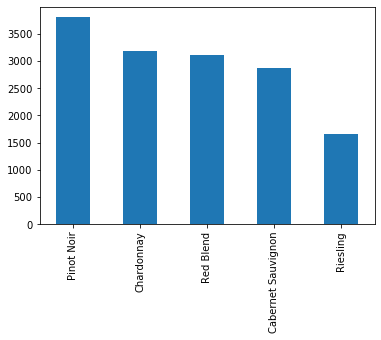

In [45]:
df["variety"].value_counts().head().plot(kind="bar")

In [46]:
# Il paese con più vini

In [47]:
df["country"].value_counts().head()

US        15707
Italy      4926
France     4371
Spain      2660
Chile      1781
Name: country, dtype: int64

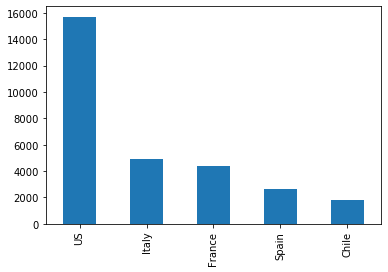

In [48]:
df["country"].value_counts().head().plot(kind="bar")


In [49]:
# Il vino più costoso 

In [50]:
df.loc[df['price'].idxmax()]

country                                                           US
description        The nose on this single-vineyard wine from a s...
designation                                      Roger Rose Vineyard
points                                                            91
price                                                           2013
province                                                  California
region_1                                                 Arroyo Seco
region_2                                               Central Coast
variety                                                   Chardonnay
winery                                                         Blair
wine and winery                                  Chardonnay by Blair
Name: 13318, dtype: object

In [51]:
# Vini con più punti

In [52]:
df.loc[df['points'].idxmax()]

country                                                           US
description        A perfect score has to be considered in the co...
designation                                          Hillside Select
points                                                           100
price                                                            215
province                                                  California
region_1                                         Stags Leap District
region_2                                                        Napa
variety                                           Cabernet Sauvignon
winery                                                        Shafer
wine and winery                         Cabernet Sauvignon by Shafer
Name: 92916, dtype: object

In [53]:
# I 5 con il punteggio più alto
largest_five =df.nlargest(5, ["points"]) 
largest_five

,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine and winery
92916,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Stags Leap District,Napa,Cabernet Sauvignon,Shafer,Cabernet Sauvignon by Shafer
2146,Italy,"Perfumed berry, rose, new leather and dark spi...",Madonna delle Grazie,99,200.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Il Marroneto,Sangiovese by Il Marroneto
28600,Italy,"Elegant and complex, this gorgeous wine is all...",Monprivato,99,175.0,Piedmont,Barolo,NaN,Nebbiolo,Mascarello Giuseppe e Figlio,Nebbiolo by Mascarello Giuseppe e Figlio
33896,Italy,"One of Italy's most iconic bottlings, the 2012...",Sassicaia,99,235.0,Tuscany,Bolgheri Sassicaia,NaN,Red Blend,Tenuta San Guido,Red Blend by Tenuta San Guido
34649,US,"A stupendous Pinot Noir, showing how beautiful...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,Sonoma,Pinot Noir,Williams Selyem,Pinot Noir by Williams Selyem


In [54]:
import seaborn as sn

Text(0.5, 1.0, 'Relation wine and points')

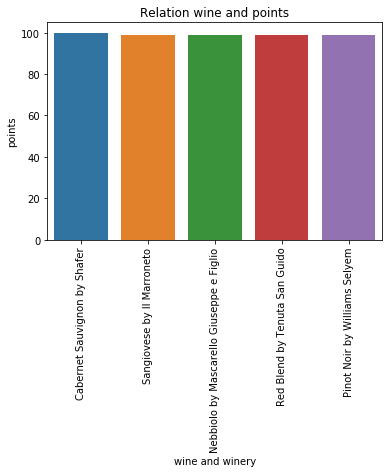

In [55]:
ax = sn.barplot(x="wine and winery", y="points" ,data=largest_five)
# rortate x label , problem to rotate the name not fit the bar 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Relation wine and points')

In [56]:
largest_five=df.nlargest(5, ['price']) 

Text(0.5, 1.0, 'Relation price for wine')

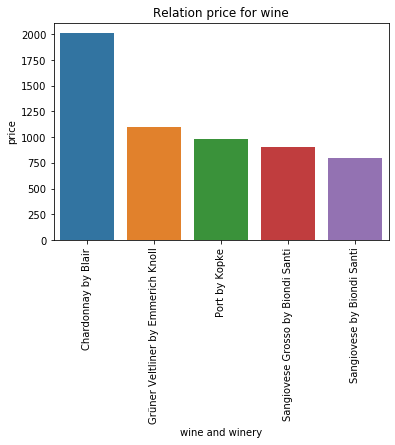

In [57]:
ax = sn.barplot(x="wine and winery", y="price" ,data=largest_five)
# rortate x label , problem to rotate the name not fit the bar 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Relation price for wine")

Text(0.5, 1.0, 'Relation country and compound ')

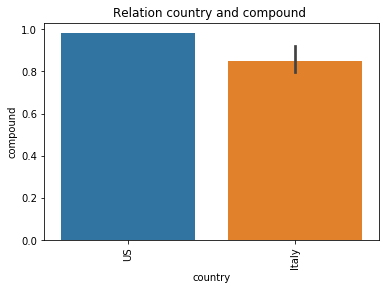

In [118]:
ax = sn.barplot(x="country", y="compound" ,data=B5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Relation country and compound ')

Text(0.5, 1.0, 'Relation contry and price')

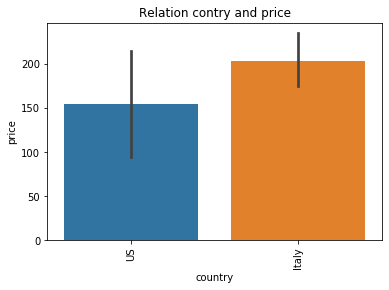

In [119]:
ax = sn.barplot(x="country", y="price" ,data=B5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Relation contry and price')

In [58]:
# Find the most common words in description 

In [59]:
# NLP time

In [61]:
# Import spaCy and load the English language library
import spacy
nlp = spacy.load('en')

In [62]:
import nltk
from nltk.corpus import stopwords

In [63]:
#not use de df but the new "variable":



#prezzo
the_most_expensive=df.nlargest(5, ['price'])
#punti / rating
Best_5_points=df.nlargest(5, ["points"])
#maggiori vini 
most_quantity_wine=df["variety"].value_counts()


In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [65]:
sid = SentimentIntensityAnalyzer()

In [66]:
Best_5_points.iloc[0]["description"]

"A perfect score has to be considered in the context of its region. Shafer's 2004 Hillside Select is tremendous as a Napa Valley Cabernet Sauvignon that competes with its peers at the highest levels. It's always a fabulous wine, but in warm 2004, Shafer's amphitheater vineyard sheltered the grapes, ripening them to perfection yet protecting the “iron fist in a velvet glove” structure that André Tchelistcheff defined as Stags Leap. This 100% Cabernet is tremendous in cassis, black currant and mocha flavors, and the 100% new French oak provides perfect additions of smoke and caramel. It's soft and gorgeous enough to drink now, and should age well in a cool cellar for the next 20 years."

In [67]:
# Calcuate polarity 
sid.polarity_scores(Best_5_points.iloc[0]["description"])

{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.9819}

In [68]:
# New column with polarity for each row in descrption column 
Best_5_points["scores"] = Best_5_points["description"].apply(lambda description: sid.polarity_scores(description))

In [69]:
Best_5_points.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine and winery,scores
92916,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Stags Leap District,Napa,Cabernet Sauvignon,Shafer,Cabernet Sauvignon by Shafer,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp..."
2146,Italy,"Perfumed berry, rose, new leather and dark spi...",Madonna delle Grazie,99,200.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Il Marroneto,Sangiovese by Il Marroneto,"{'neg': 0.063, 'neu': 0.741, 'pos': 0.196, 'co..."
28600,Italy,"Elegant and complex, this gorgeous wine is all...",Monprivato,99,175.0,Piedmont,Barolo,NaN,Nebbiolo,Mascarello Giuseppe e Figlio,Nebbiolo by Mascarello Giuseppe e Figlio,"{'neg': 0.046, 'neu': 0.797, 'pos': 0.157, 'co..."
33896,Italy,"One of Italy's most iconic bottlings, the 2012...",Sassicaia,99,235.0,Tuscany,Bolgheri Sassicaia,NaN,Red Blend,Tenuta San Guido,Red Blend by Tenuta San Guido,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp..."
34649,US,"A stupendous Pinot Noir, showing how beautiful...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,Sonoma,Pinot Noir,Williams Selyem,Pinot Noir by Williams Selyem,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp..."


In [70]:
Best_5_points["compound"]= Best_5_points["scores"].apply(lambda d:d ["compound"])
#df["compound"]= df["scores"].apply(lambda d:d ["compound"])

In [71]:
Best_5_points.head()
#df.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine and winery,scores,compound
92916,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Stags Leap District,Napa,Cabernet Sauvignon,Shafer,Cabernet Sauvignon by Shafer,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.9819
2146,Italy,"Perfumed berry, rose, new leather and dark spi...",Madonna delle Grazie,99,200.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Il Marroneto,Sangiovese by Il Marroneto,"{'neg': 0.063, 'neu': 0.741, 'pos': 0.196, 'co...",0.9186
28600,Italy,"Elegant and complex, this gorgeous wine is all...",Monprivato,99,175.0,Piedmont,Barolo,NaN,Nebbiolo,Mascarello Giuseppe e Figlio,Nebbiolo by Mascarello Giuseppe e Figlio,"{'neg': 0.046, 'neu': 0.797, 'pos': 0.157, 'co...",0.8370
33896,Italy,"One of Italy's most iconic bottlings, the 2012...",Sassicaia,99,235.0,Tuscany,Bolgheri Sassicaia,NaN,Red Blend,Tenuta San Guido,Red Blend by Tenuta San Guido,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.7964
34649,US,"A stupendous Pinot Noir, showing how beautiful...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,Sonoma,Pinot Noir,Williams Selyem,Pinot Noir by Williams Selyem,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.9805


In [72]:
Best_5_points["comp_score"]= Best_5_points["compound"].apply(lambda score:"positive" if score>=0 else "negative")

#df["comp_score"]= df["compound"].apply(lambda score:"positive" if score>=0 else "negative")

In [73]:
Best_5_points.head(2)
#df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine and winery,scores,compound,comp_score
92916,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Stags Leap District,Napa,Cabernet Sauvignon,Shafer,Cabernet Sauvignon by Shafer,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.9819,positive
2146,Italy,"Perfumed berry, rose, new leather and dark spi...",Madonna delle Grazie,99,200.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Il Marroneto,Sangiovese by Il Marroneto,"{'neg': 0.063, 'neu': 0.741, 'pos': 0.196, 'co...",0.9186,positive


In [74]:
Best_5_points["comp_score"]= Best_5_points["compound"].apply(lambda score:"positive" if score>=0 else "negative")

#df["comp_score"]= df["compound"].apply(lambda score:"positive" if score>=0 else "negative")

In [75]:
Best_5_points.head(2)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine and winery,scores,compound,comp_score
92916,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Stags Leap District,Napa,Cabernet Sauvignon,Shafer,Cabernet Sauvignon by Shafer,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.9819,positive
2146,Italy,"Perfumed berry, rose, new leather and dark spi...",Madonna delle Grazie,99,200.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Il Marroneto,Sangiovese by Il Marroneto,"{'neg': 0.063, 'neu': 0.741, 'pos': 0.196, 'co...",0.9186,positive


In [76]:
def rating (points):
    if points < 85:
        return "no good"
    if points > 85 and points <95:
        return "good"
    else:
        return "exellent"

In [77]:
type(rating)

function

In [78]:
Best_5_points["rating"]= df.points.apply(rating)

In [79]:
Best_5_points.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine and winery,scores,compound,comp_score,rating
92916,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Stags Leap District,Napa,Cabernet Sauvignon,Shafer,Cabernet Sauvignon by Shafer,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.9819,positive,exellent
2146,Italy,"Perfumed berry, rose, new leather and dark spi...",Madonna delle Grazie,99,200.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Il Marroneto,Sangiovese by Il Marroneto,"{'neg': 0.063, 'neu': 0.741, 'pos': 0.196, 'co...",0.9186,positive,exellent
28600,Italy,"Elegant and complex, this gorgeous wine is all...",Monprivato,99,175.0,Piedmont,Barolo,NaN,Nebbiolo,Mascarello Giuseppe e Figlio,Nebbiolo by Mascarello Giuseppe e Figlio,"{'neg': 0.046, 'neu': 0.797, 'pos': 0.157, 'co...",0.8370,positive,exellent
33896,Italy,"One of Italy's most iconic bottlings, the 2012...",Sassicaia,99,235.0,Tuscany,Bolgheri Sassicaia,NaN,Red Blend,Tenuta San Guido,Red Blend by Tenuta San Guido,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.7964,positive,exellent
34649,US,"A stupendous Pinot Noir, showing how beautiful...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,Sonoma,Pinot Noir,Williams Selyem,Pinot Noir by Williams Selyem,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.9805,positive,exellent


In [80]:
Best_5_points["rating"].value_counts()

#df["rating"].value_counts()

exellent    5
Name: rating, dtype: int64

In [81]:
#df["rating"].value_counts().plot(kind="bar")

In [82]:
# The Place of the Best wine for rating

Best_5_points[['region_1','rating']].loc[Best_5_points['rating'] == 'exellent']

#df[['region_1','rating']].loc[df['rating'] == 'exellent']

,region_1,rating
92916,Stags Leap District,exellent
2146,Brunello di Montalcino,exellent
28600,Barolo,exellent
33896,Bolgheri Sassicaia,exellent
34649,Sonoma Coast,exellent


In [83]:
# Create wordcloud for write the best description 

In [84]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [85]:
# Add the words to the set of stop words. Use lowercase!

stop_words.extend(['.', '-', ',', ':', ';',"a","”","''","'s","“"])

In [86]:
# Tokenization of Text

In [87]:
from nltk.tokenize import word_tokenize 

In [88]:
Best_5_points['tokenized_sents'] = Best_5_points.apply(lambda row: nltk.word_tokenize(row['description']), axis=1)

#df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['description']), axis=1)

In [89]:
Best_5_points.head()

# sort dataframe by most compound positive

B5 = Best_5_points.sort_values(['compound'], ascending=[False])
B5

,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine and winery,scores,compound,comp_score,rating,tokenized_sents
92916,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Stags Leap District,Napa,Cabernet Sauvignon,Shafer,Cabernet Sauvignon by Shafer,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.9819,positive,exellent,"[A, perfect, score, has, to, be, considered, i..."
34649,US,"A stupendous Pinot Noir, showing how beautiful...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,Sonoma,Pinot Noir,Williams Selyem,Pinot Noir by Williams Selyem,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.9805,positive,exellent,"[A, stupendous, Pinot, Noir, ,, showing, how, ..."
2146,Italy,"Perfumed berry, rose, new leather and dark spi...",Madonna delle Grazie,99,200.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Il Marroneto,Sangiovese by Il Marroneto,"{'neg': 0.063, 'neu': 0.741, 'pos': 0.196, 'co...",0.9186,positive,exellent,"[Perfumed, berry, ,, rose, ,, new, leather, an..."
28600,Italy,"Elegant and complex, this gorgeous wine is all...",Monprivato,99,175.0,Piedmont,Barolo,NaN,Nebbiolo,Mascarello Giuseppe e Figlio,Nebbiolo by Mascarello Giuseppe e Figlio,"{'neg': 0.046, 'neu': 0.797, 'pos': 0.157, 'co...",0.8370,positive,exellent,"[Elegant, and, complex, ,, this, gorgeous, win..."
33896,Italy,"One of Italy's most iconic bottlings, the 2012...",Sassicaia,99,235.0,Tuscany,Bolgheri Sassicaia,NaN,Red Blend,Tenuta San Guido,Red Blend by Tenuta San Guido,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.7964,positive,exellent,"[One, of, Italy, 's, most, iconic, bottlings, ..."


In [90]:
Best_5_points["tokenized_sents"]

92916    [A, perfect, score, has, to, be, considered, i...
2146     [Perfumed, berry, ,, rose, ,, new, leather, an...
28600    [Elegant, and, complex, ,, this, gorgeous, win...
33896    [One, of, Italy, 's, most, iconic, bottlings, ...
34649    [A, stupendous, Pinot, Noir, ,, showing, how, ...
Name: tokenized_sents, dtype: object

In [91]:
# Apply stopword 

In [92]:
Best_5_points['new_reviews'] = Best_5_points['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop_words])

#df['new_reviews'] = df['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop_words])

In [93]:
len(Best_5_points['new_reviews'].iloc[0])
#len(Best_5_points['new_reviews'][0]) 

#len(df['new_reviews'][0])

76

In [98]:
for etichetta in Best_5_points['new_reviews'].iloc[:]:
    print (etichetta)

['A', 'perfect', 'score', 'considered', 'context', 'region', 'Shafer', '2004', 'Hillside', 'Select', 'tremendous', 'Napa', 'Valley', 'Cabernet', 'Sauvignon', 'competes', 'peers', 'highest', 'levels', 'It', 'always', 'fabulous', 'wine', 'warm', '2004', 'Shafer', 'amphitheater', 'vineyard', 'sheltered', 'grapes', 'ripening', 'perfection', 'yet', 'protecting', 'iron', 'fist', 'velvet', 'glove', 'structure', 'André', 'Tchelistcheff', 'defined', 'Stags', 'Leap', 'This', '100', '%', 'Cabernet', 'tremendous', 'cassis', 'black', 'currant', 'mocha', 'flavors', '100', '%', 'new', 'French', 'oak', 'provides', 'perfect', 'additions', 'smoke', 'caramel', 'It', 'soft', 'gorgeous', 'enough', 'drink', 'age', 'well', 'cool', 'cellar', 'next', '20', 'years']
['Perfumed', 'berry', 'rose', 'new', 'leather', 'dark', 'spice', 'enticing', 'scents', "'ll", 'find', 'vibrant', 'wine', 'It', 'still', 'tightly', 'wound', 'already', 'dazzles', 'juicy', 'wild', 'cherry', 'crushed', 'raspberry', 'cinnamon', 'nutmeg'

In [99]:
type(etichetta)

list

# WordCloud

In [100]:
# Take the text from new reviw and put in a list
# Convert list in str
# Generate wordcloud

In [101]:
wine1 = ['perfect',
 'score',
 'considered',
 'context',
 'region',
 'Shafer',
 '2004',
 'Hillside',
 'Select',
 'tremendous',
 'Napa',
 'Valley',
 'Cabernet',
 'Sauvignon',
 'competes',
 'peers',
 'highest',
 'levels',
 'It',
 'always',
 'fabulous',
 'wine',
 'warm',
 '2004',
 'Shafer',
 'amphitheater',
 'vineyard',
 'sheltered',
 'grapes',
 'ripening',
 'perfection',
 'yet',
 'protecting',
 'iron',
 'fist',
 'velvet',
 'glove',
 'structure',
 'André',
 'Tchelistcheff',
 'defined',
 'Stags',
 'Leap',
 'This',
 '100',
 '%',
 'Cabernet',
 'tremendous',
 'cassis',
 'black',
 'currant',
 'mocha',
 'flavors',
 '100',
 '%',
 'new',
 'French',
 'oak',
 'provides',
 'perfect',
 'additions',
 'smoke',
 'caramel',
 'It',
 'soft',
 'gorgeous',
 'enough',
 'drink',
 'age',
 'well',
 'cool',
 'cellar',
 'next',
 '20',
 'years']

In [102]:
type(wine1)

list

In [103]:
doc1_str= ','.join(wine1)

In [104]:
type(doc1_str)

str

In [117]:
#Count the occurency

from collections import Counter
cnt = Counter()
for word in total_5_wine_description:
    cnt[word] +=1 

type(cnt)
cnt.most_common(15)

[('wine', 5),
 ('Cabernet', 4),
 ('It', 4),
 ('%', 4),
 ('flavors', 3),
 ('gorgeous', 3),
 ('juicy', 3),
 ('Drink', 3),
 ('perfect', 2),
 ('Shafer', 2),
 ('2004', 2),
 ('tremendous', 2),
 ('Sauvignon', 2),
 ('vineyard', 2),
 ('yet', 2)]

In [105]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud #, STOPWORDS

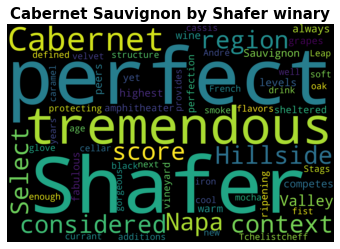

In [106]:
Word_Cloud = WordCloud(
    background_color = 'black',
    #max_words=20,
    width=2400,height=1600, 
    normalize_plurals= True,
    #stopwords = stopwords,
    margin=3
).generate(doc1_str)

plt.imshow(Word_Cloud, interpolation='bilinear')
plt.title(
    'Cabernet Sauvignon by Shafer winary',
    fontweight = 'bold',
    fontsize=15
)
plt.axis("off")
#plt.figure(figsize=(15,10))
plt.margins(x=0, y=0)
#plt.savefig('Parte_uno.png')
plt.show()

Wine 2 

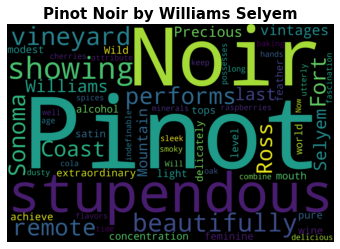

In [107]:
wine2= ['stupendous', 'Pinot', 'Noir', 'showing', 'beautifully', 'vineyard', 'performs', 'remote', 'Sonoma', 'Coast', 'Fort', 'Ross', 'Williams', 'Selyem', 'last', 'vintages', 'Precious', 'Mountain', 'extraordinary', '2009', 'tops', 'The', 'wine', 'light', 'feather', 'mouth', 'modest', 'alcohol', 'delicately', 'feminine', 'like', 'pure', 'satin', 'However', 'Pinot', 'Noirs', 'world', 'achieve', 'level', 'concentration', 'Wild', 'raspberries', 'cherries', 'cola', 'sleek', 'minerals', 'dusty', 'baking', 'spices', 'smoky', 'oak', 'combine', 'flavors', 'utterly', 'delicious', 'After', 'possesses', 'indefinable', 'attribute', 'fascination', 'Will', 'age', 'well', 'long', 'time', 'keep', 'hands', 'Now–2021']
doc2_str= ",".join(wine2)
Word_Cloud = WordCloud(
    background_color = 'black',
    #max_words=20,
    width=2400,height=1600, 
    normalize_plurals= True,
    #stopwords = stopwords,
    margin=3
).generate(doc2_str) 

plt.imshow(Word_Cloud, interpolation='bilinear')
plt.title(
    'Pinot Noir by Williams Selyem',
    fontweight = 'bold',
    fontsize=15
)
plt.axis("off")
#plt.figure(figsize=(15,10))
plt.margins(x=0, y=0)
#plt.savefig('Parte_uno.png')
plt.show()

wine 3

In [108]:
wine3 = ['Perfumed', 'berry', 'rose', 'new', 'leather', 'dark', 'spice', 'enticing', 'scents', "'ll", 'find', 'vibrant', 'wine', 'It', 'still', 'tightly', 'wound', 'already', 'dazzles', 'juicy', 'wild', 'cherry', 'crushed', 'raspberry', 'cinnamon', 'nutmeg', 'pipe', 'tobacco', 'flavors', 'Youthfully', 'austere', 'noble', 'tannins', 'bright', 'acidity', 'provide', 'balance', 'serious', 'aging', 'potential', 'Do', "n't", 'tempted', 'open', 'soon—the', 'best', 'yet', 'come', 'Drink', '2022–2042']

In [109]:
doc3_str= ','.join(wine3)

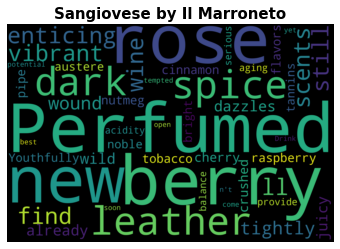

In [110]:
Word_Cloud = WordCloud(
    background_color = 'black',
    #max_words=20,
    width=2400,height=1600, 
    normalize_plurals= True,
    #stopwords = stopwords,
    margin=3
).generate(doc3_str)

plt.imshow(Word_Cloud, interpolation='bilinear')
plt.title(
    'Sangiovese by Il Marroneto',
    fontweight = 'bold',
    fontsize=15
)
plt.axis("off")
#plt.figure(figsize=(15,10))
plt.margins(x=0, y=0)
#plt.savefig('Parte_uno.png')
plt.show()

wine4 

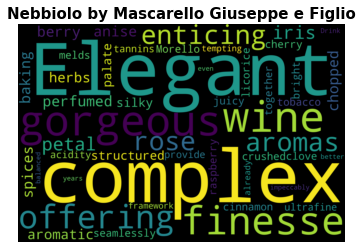

In [111]:
wine4 = ['Elegant', 'complex', 'gorgeous', 'wine', 'finesse', 'offering', 'enticing', 'aromas', 'rose', 'petal', 'iris', 'perfumed', 'berry', 'baking', 'spices', 'anise', 'chopped', 'aromatic', 'herbs', 'The', 'structured', 'silky', 'palate', 'seamlessly', 'melds', 'together', 'juicy', 'Morello', 'cherry', 'crushed', 'raspberry', 'cinnamon', 'clove', 'licorice', 'tobacco', 'bright', 'acidity', 'ultrafine', 'tannins', 'provide', 'framework', 'It', 'already', 'tempting', 'impeccably', 'balanced', 'even', 'better', 'years', 'Drink', '2018–2030']

doc4_str= ','.join(wine4)

Word_Cloud = WordCloud(
    background_color = 'black',
    #max_words=20,
    width=2400,height=1600, 
    normalize_plurals= True,
    #stopwords = stopwords,
    margin=3
).generate(doc4_str) 

plt.imshow(Word_Cloud, interpolation='bilinear')
plt.title(
    'Nebbiolo by Mascarello Giuseppe e Figlio',
    fontweight = 'bold',
    fontsize=15
)
plt.axis("off")
#plt.figure(figsize=(15,10))
plt.margins(x=0, y=0)
#plt.savefig('Parte_uno.png')
plt.show()

wine5

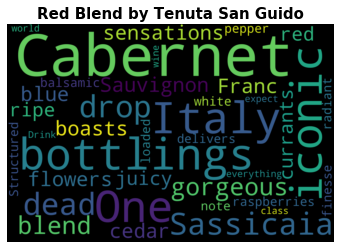

In [112]:
wine5= ['One', 'Italy', 'iconic', 'bottlings', '2012', 'Sassicaia', 'drop-dead', 'gorgeous', 'blend', '85', '%', 'Cabernet', 'Sauvignon', '15', '%', 'Cabernet', 'Franc', 'boasts', 'sensations', 'blue', 'flowers', 'cedar', 'juicy', 'red', 'currants', 'ripe', 'raspberries', 'white', 'pepper', 'balsamic', 'note', 'Structured', 'radiant', 'loaded', 'finesse', 'delivers', 'everything', "'d", 'expect', 'world-class', 'wine', 'Drink', '2018–2032']

doc5_str= ','.join(wine5)

Word_Cloud = WordCloud(
    background_color = 'black',
    #max_words=20,
    width=2400,height=1600, 
    normalize_plurals= True,
    #stopwords = stopwords,
    margin=3
).generate(doc5_str)  

plt.imshow(Word_Cloud, interpolation='bilinear')
plt.title(
    'Red Blend by Tenuta San Guido',
    fontweight = 'bold',
    fontsize=15
)
plt.axis("off")
#plt.figure(figsize=(15,10))
plt.margins(x=0, y=0)
#plt.savefig('Parte_uno.png')
plt.show()

total 5 wine 

In [113]:
total_5_wine_description= ['perfect', 'score', 'considered', 'context', 'region', 'Shafer', '2004', 'Hillside', 'Select', 'tremendous', 'Napa', 'Valley', 'Cabernet', 'Sauvignon', 'competes', 'peers', 'highest', 'levels', 'It', 'always', 'fabulous', 'wine', 'warm', '2004', 'Shafer', 'amphitheater', 'vineyard', 'sheltered', 'grapes', 'ripening', 'perfection', 'yet', 'protecting', 'iron', 'fist', 'velvet', 'glove', 'structure', 'André', 'Tchelistcheff', 'defined', 'Stags', 'Leap', 'This', '100', '%', 'Cabernet', 'tremendous', 'cassis', 'black', 'currant', 'mocha', 'flavors', '100', '%', 'new', 'French', 'oak', 'provides', 'perfect', 'additions', 'smoke', 'caramel', 'It', 'soft', 'gorgeous', 'enough', 'drink', 'age', 'well', 'cool', 'cellar', 'next', '20', 'years','Perfumed', 'berry', 'rose', 'new', 'leather', 'dark', 'spice', 'enticing', 'scents', "'ll", 'find', 'vibrant', 'wine', 'It', 'still', 'tightly', 'wound', 'already', 'dazzles', 'juicy', 'wild', 'cherry', 'crushed', 'raspberry', 'cinnamon', 'nutmeg', 'pipe', 'tobacco', 'flavors', 'Youthfully', 'austere', 'noble', 'tannins', 'bright', 'acidity', 'provide', 'balance', 'serious', 'aging', 'potential', 'Do', "n't", 'tempted', 'open', 'soon—the', 'best', 'yet', 'come', 'Drink', '2022–2042','Elegant', 'complex', 'gorgeous', 'wine', 'finesse', 'offering', 'enticing', 'aromas', 'rose', 'petal', 'iris', 'perfumed', 'berry', 'baking', 'spices', 'anise', 'chopped', 'aromatic', 'herbs', 'The', 'structured', 'silky', 'palate', 'seamlessly', 'melds', 'together', 'juicy', 'Morello', 'cherry', 'crushed', 'raspberry', 'cinnamon', 'clove', 'licorice', 'tobacco', 'bright', 'acidity', 'ultrafine', 'tannins', 'provide', 'framework', 'It', 'already', 'tempting', 'impeccably', 'balanced', 'even', 'better', 'years', 'Drink', '2018–2030','One', 'Italy', 'iconic', 'bottlings', '2012', 'Sassicaia', 'drop-dead', 'gorgeous', 'blend', '85', '%', 'Cabernet', 'Sauvignon', '15', '%', 'Cabernet', 'Franc', 'boasts', 'sensations', 'blue', 'flowers', 'cedar', 'juicy', 'red', 'currants', 'ripe', 'raspberries', 'white', 'pepper', 'balsamic', 'note', 'Structured', 'radiant', 'loaded', 'finesse', 'delivers', 'everything', "'d", 'expect', 'world-class', 'wine', 'Drink', '2018–2032','stupendous', 'Pinot', 'Noir', 'showing', 'beautifully', 'vineyard', 'performs', 'remote', 'Sonoma', 'Coast', 'Fort', 'Ross', 'Williams', 'Selyem', 'last', 'vintages', 'Precious', 'Mountain', 'extraordinary', '2009', 'tops', 'The', 'wine', 'light', 'feather', 'mouth', 'modest', 'alcohol', 'delicately', 'feminine', 'like', 'pure', 'satin', 'However', 'Pinot', 'Noirs', 'world', 'achieve', 'level', 'concentration', 'Wild', 'raspberries', 'cherries', 'cola', 'sleek', 'minerals', 'dusty', 'baking', 'spices', 'smoky', 'oak', 'combine', 'flavors', 'utterly', 'delicious', 'After', 'possesses', 'indefinable', 'attribute', 'fascination', 'Will', 'age', 'well', 'long', 'time', 'keep', 'hands', 'Now–2021']

In [114]:
type(total_5_wine_description)

list

In [115]:
total_wine= ','.join(total_5_wine_description)

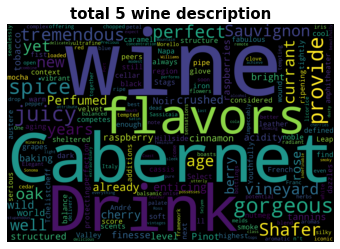

In [116]:
Word_Cloud = WordCloud(
    background_color = 'black',
    #max_words=20,
    width=2400,height=1600, 
    normalize_plurals= True,
    #stopwords = stopwords,
    margin=3
).generate(total_wine)

plt.imshow(Word_Cloud, interpolation='bilinear')
plt.title(
    'total 5 wine description',
    fontweight = 'bold',
    fontsize=15
)
plt.axis("off")
#plt.figure(figsize=(15,10))
plt.margins(x=0, y=0)
#plt.savefig('Parte_uno.png')
plt.show()

Conclusion

Where to Focus new Investment? <br>
For the market The Pinot Noir by WIlliam Selyem have the best Quality and the lowest Price!, <br>
the most wines came from to Us and the Italian wines have the highest positive scores in the market. <br>
For the wine description we can consulting the most common words reported by the highest points wines and the most commons words by the 5 best wine.<br>
